<a href="https://colab.research.google.com/github/sabill/dphi-boothcamp-ml/blob/main/datathon_1_travel_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Libraries

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split


In [141]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, Normalizer

##Dataset

In [142]:
insurance_data = pd.read_csv("https://github.com/dphi-official/Datasets/blob/master/travel_insurance/Training_set_label.csv?raw=true")
insurance_data.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

In [143]:
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [144]:
insurance_data.fillna('Not Specified', inplace=True)
insurance_data.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Gender                  0
Age                     0
Claim                   0
dtype: int64

In [145]:
data = insurance_data.drop(columns = ['Distribution Channel', 'Destination'], axis=1)
data.head()

,Agency,Agency Type,Product Name,Duration,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Rental Vehicle Excess Insurance,61,19.8,11.88,Not Specified,29,0
1,EPX,Travel Agency,Cancellation Plan,93,63.0,0.00,Not Specified,36,0
2,EPX,Travel Agency,2 way Comprehensive Plan,22,22.0,0.00,Not Specified,25,0
3,C2B,Airlines,Silver Plan,14,54.5,13.63,M,24,0
4,EPX,Travel Agency,Cancellation Plan,90,10.0,0.00,Not Specified,23,0


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Product Name          48260 non-null  object 
 3   Duration              48260 non-null  int64  
 4   Net Sales             48260 non-null  float64
 5   Commision (in value)  48260 non-null  float64
 6   Gender                48260 non-null  object 
 7   Age                   48260 non-null  int64  
 8   Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 3.3+ MB


In [147]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe_df = pd.DataFrame(ohe.fit_transform(data[['Agency','Agency Type','Product Name','Gender']]).toarray())
ohe_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [148]:
y = data.Claim
data_df = data.drop(columns = ['Agency','Agency Type','Product Name','Gender', 'Claim'], axis=1)
data_df.head()

,Duration,Net Sales,Commision (in value),Age
0,61,19.8,11.88,29
1,93,63.0,0.00,36
2,22,22.0,0.00,25
3,14,54.5,13.63,24
4,90,10.0,0.00,23


In [149]:
X = data_df.join(ohe_df)
X.head()

,Duration,Net Sales,Commision (in value),Age,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,61,19.8,11.88,29,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,93,63.0,0.00,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22,22.0,0.00,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,14,54.5,13.63,24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,90,10.0,0.00,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [150]:
X.shape

(48260, 51)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


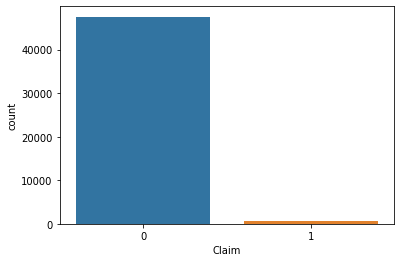

In [151]:
sns.countplot(y,label="Count")

In [152]:
ohe.categories_

[array(['ADM', 'ART', 'C2B', 'CBH', 'CCR', 'CSR', 'CWT', 'EPX', 'JWT',
        'JZI', 'KML', 'LWC', 'RAB', 'SSI', 'TST', 'TTW'], dtype=object),
 array(['Airlines', 'Travel Agency'], dtype=object),
 array(['1 way Comprehensive Plan', '2 way Comprehensive Plan',
        '24 Protect', 'Annual Gold Plan', 'Annual Silver Plan',
        'Annual Travel Protect Gold', 'Annual Travel Protect Platinum',
        'Annual Travel Protect Silver', 'Basic Plan', 'Bronze Plan',
        'Cancellation Plan', 'Child Comprehensive Plan',
        'Comprehensive Plan', 'Gold Plan', 'Individual Comprehensive Plan',
        'Premier Plan', 'Rental Vehicle Excess Insurance', 'Silver Plan',
        'Single Trip Travel Protect Gold',
        'Single Trip Travel Protect Platinum',
        'Single Trip Travel Protect Silver',
        'Spouse or Parents Comprehensive Plan', 'Ticket Protector',
        'Travel Cruise Protect', 'Travel Cruise Protect Family',
        'Value Plan'], dtype=object),
 array(['F', 'M', 'No

In [153]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

##Model Neural Network Binary Classification

In [154]:
# plt.figure(figsize = (41,41))
# ax = sns.heatmap(vertical_stack.corr(), annot=True, linewidths=.3)

In [155]:
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)
#X_train, X_val, y_train, y_val = train_test_split(train_features, train_label, test_size=0.3)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(33782, 51) (7239, 51) (33782,) (7239,)


In [156]:
# use smote to equalize the classes on training set splitted in

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=25)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 482
Before OverSampling, counts of label '0': 33300 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (66600, 51)
After OverSampling, the shape of train_y: (66600,) 

After OverSampling, counts of label '1': 33300
After OverSampling, counts of label '0': 33300


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


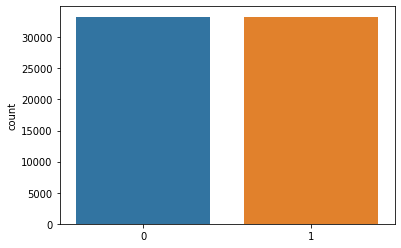

In [157]:
sns.countplot(y_train,label="Count")

In [158]:
#Normalize

# # Training Data
# X_train = MinMaxScaler().fit_transform(X_train)
# print("Training Data :", X_train.shape)

# # Testing Data
# X_test = MinMaxScaler().fit_transform(X_test)
# print("Testing Data :", X_test.shape)

In [159]:
# vertical_stack = pd.concat([X, y], axis=1)
# vertical_stack.head()

In [160]:
print("Training Data :",X_train.shape)
print("Testing Data :",X_test.shape)

Training Data : (66600, 51)
Testing Data : (7239, 51)


In [161]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [162]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(51,), kernel_initializer='random_normal', name='hidden1'),
    #Dropout(0,2),
    Dense(126, activation='relu', name='hidden2'),
    #Dropout(0,2),
    Dense(1, activation='sigmoid', name='output')
])
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['acc'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 64)                3328      
_________________________________________________________________
hidden2 (Dense)              (None, 126)               8190      
_________________________________________________________________
output (Dense)               (None, 1)                 127       
Total params: 11,645
Trainable params: 11,645
Non-trainable params: 0
_________________________________________________________________


In [168]:
history = model.fit(X_train, y_train, batch_size=20, epochs=70, validation_data=(X_val,y_val))

Epoch 1/70
3330/3330 [==============================] - 4s 1ms/step - loss: 0.3457 - acc: 0.8455 - val_loss: 0.3261 - val_acc: 0.8551
Epoch 2/70
3330/3330 [==============================] - 4s 1ms/step - loss: 0.3344 - acc: 0.8505 - val_loss: 0.3422 - val_acc: 0.8193
Epoch 3/70
3330/3330 [==============================] - 4s 1ms/step - loss: 0.3211 - acc: 0.8573 - val_loss: 0.4136 - val_acc: 0.7587
Epoch 4/70
3330/3330 [==============================] - 4s 1ms/step - loss: 0.3110 - acc: 0.8609 - val_loss: 0.3613 - val_acc: 0.8063
Epoch 5/70
3330/3330 [==============================] - 4s 1ms/step - loss: 0.3025 - acc: 0.8635 - val_loss: 0.3781 - val_acc: 0.8041
Epoch 6/70
3330/3330 [==============================] - 4s 1ms/step - loss: 0.2933 - acc: 0.8676 - val_loss: 0.3427 - val_acc: 0.8270
Epoch 7/70
3330/3330 [==============================] - 4s 1ms/step - loss: 0.2866 - acc: 0.8706 - val_loss: 0.3452 - val_acc: 0.8446
Epoch 8/70
3330/3330 [==============================] - 4s 1ms

In [169]:
model.evaluate(X_test, y_test)

227/227 [==============================] - 0s 797us/step - loss: 0.3426 - acc: 0.8961


[0.3426252603530884, 0.8961182236671448]

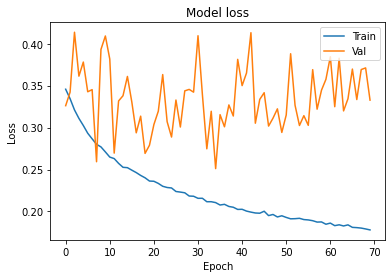

In [170]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

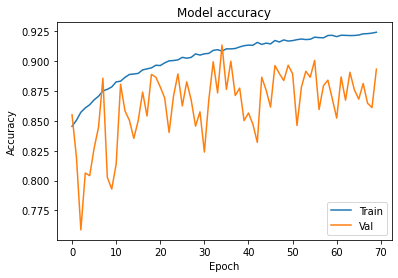

In [171]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [172]:
#Trial in data tes submission

test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')
test_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,EPX,Travel Agency,Online,Cancellation Plan,24,HONG KONG,27.0,0.0,NaN,36
1,EPX,Travel Agency,Online,Cancellation Plan,51,JAPAN,45.0,0.0,NaN,36
2,EPX,Travel Agency,Online,Cancellation Plan,52,JAPAN,21.0,0.0,NaN,21
3,EPX,Travel Agency,Online,Cancellation Plan,89,SINGAPORE,11.0,0.0,NaN,30
4,EPX,Travel Agency,Online,Cancellation Plan,5,MALAYSIA,10.0,0.0,NaN,33


In [173]:
test_data.Gender.fillna('Not Specified', inplace=True)
test_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,EPX,Travel Agency,Online,Cancellation Plan,24,HONG KONG,27.0,0.0,Not Specified,36
1,EPX,Travel Agency,Online,Cancellation Plan,51,JAPAN,45.0,0.0,Not Specified,36
2,EPX,Travel Agency,Online,Cancellation Plan,52,JAPAN,21.0,0.0,Not Specified,21
3,EPX,Travel Agency,Online,Cancellation Plan,89,SINGAPORE,11.0,0.0,Not Specified,30
4,EPX,Travel Agency,Online,Cancellation Plan,5,MALAYSIA,10.0,0.0,Not Specified,33


In [174]:
print(test_data['Product Name'].unique())
test_data.nunique()

['Cancellation Plan' 'Rental Vehicle Excess Insurance' 'Bronze Plan'
 'Silver Plan' '2 way Comprehensive Plan' 'Travel Cruise Protect'
 'Basic Plan' '1 way Comprehensive Plan' 'Value Plan' 'Annual Silver Plan'
 'Premier Plan' 'Comprehensive Plan' '24 Protect' 'Gold Plan'
 'Single Trip Travel Protect Gold' 'Individual Comprehensive Plan'
 'Annual Travel Protect Platinum' 'Ticket Protector'
 'Single Trip Travel Protect Silver' 'Child Comprehensive Plan'
 'Single Trip Travel Protect Platinum' 'Annual Gold Plan'
 'Annual Travel Protect Gold' 'Annual Travel Protect Silver'
 'Spouse or Parents Comprehensive Plan']


Agency                   16
Agency Type               2
Distribution Channel      2
Product Name             25
Duration                373
Destination             117
Net Sales               647
Commision (in value)    612
Gender                    3
Age                      82
dtype: int64

In [175]:
print(insurance_data['Product Name'].unique())
insurance_data.nunique()

['Rental Vehicle Excess Insurance' 'Cancellation Plan'
 '2 way Comprehensive Plan' 'Silver Plan' '1 way Comprehensive Plan'
 'Basic Plan' 'Travel Cruise Protect' 'Annual Silver Plan' '24 Protect'
 'Value Plan' 'Bronze Plan' 'Ticket Protector' 'Gold Plan'
 'Comprehensive Plan' 'Single Trip Travel Protect Silver'
 'Single Trip Travel Protect Platinum' 'Annual Gold Plan'
 'Individual Comprehensive Plan' 'Single Trip Travel Protect Gold'
 'Premier Plan' 'Annual Travel Protect Gold' 'Child Comprehensive Plan'
 'Spouse or Parents Comprehensive Plan' 'Annual Travel Protect Silver'
 'Annual Travel Protect Platinum' 'Travel Cruise Protect Family']


Agency                    16
Agency Type                2
Distribution Channel       2
Product Name              26
Duration                 442
Destination              141
Net Sales               1005
Commision (in value)     922
Gender                     3
Age                       88
Claim                      2
dtype: int64

In [176]:
test = test_data.drop(columns = ['Distribution Channel', 'Destination'], axis=1)
test.head()

,Agency,Agency Type,Product Name,Duration,Net Sales,Commision (in value),Gender,Age
0,EPX,Travel Agency,Cancellation Plan,24,27.0,0.0,Not Specified,36
1,EPX,Travel Agency,Cancellation Plan,51,45.0,0.0,Not Specified,36
2,EPX,Travel Agency,Cancellation Plan,52,21.0,0.0,Not Specified,21
3,EPX,Travel Agency,Cancellation Plan,89,11.0,0.0,Not Specified,30
4,EPX,Travel Agency,Cancellation Plan,5,10.0,0.0,Not Specified,33


In [177]:
#ohe = OneHotEncoder(handle_unknown='ignore')
ohe_test = pd.DataFrame(ohe.fit_transform(test[['Agency','Agency Type','Product Name','Gender']]).toarray())
ohe_test.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [178]:
data_origin = ohe_test.copy()

ohe_test[18] = data_origin[19]
ohe_test[19] = data_origin[18]
ohe_test[20] = data_origin[28]
ohe_test[21] = data_origin[21]
ohe_test[22] = data_origin[20]
ohe_test[23] = data_origin[24]
ohe_test[24] = data_origin[23]
ohe_test[25] = data_origin[22]
ohe_test[26] = data_origin[27]
ohe_test[27] = data_origin[25]
ohe_test[28] = data_origin[37]
ohe_test[29] = data_origin[31]
ohe_test[30] = data_origin[26]
ohe_test[31] = data_origin[30]
ohe_test[32] = data_origin[36]
ohe_test[33] = data_origin[35]
ohe_test[34] = data_origin[42]
ohe_test[35] = data_origin[29]
ohe_test[36] = data_origin[32]
ohe_test[37] = data_origin[39]
ohe_test[38] = data_origin[33]
ohe_test[39] = data_origin[34]
ohe_test[40] = data_origin[38]
ohe_test[41] = data_origin[41]
ohe_test[42] = data_origin[40]
ohe_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [179]:
ohe_test[46] = ohe_test[45]
ohe_test[45] = ohe_test[44]
ohe_test[44] = ohe_test[43]
ohe_test[43] = 0
ohe_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0


In [180]:
oheohe = ohe_test.astype('int')
oheohe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [181]:
test_fix = test.drop(columns = ['Agency','Agency Type','Product Name','Gender'], axis=1)
test_fix.head()

,Duration,Net Sales,Commision (in value),Age
0,24,27.0,0.0,36
1,51,45.0,0.0,36
2,52,21.0,0.0,21
3,89,11.0,0.0,30
4,5,10.0,0.0,33


In [182]:
test_fix = test_fix.join(oheohe)
test_fix.head()

,Duration,Net Sales,Commision (in value),Age,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,24,27.0,0.0,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,51,45.0,0.0,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,52,21.0,0.0,21,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,89,11.0,0.0,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,10.0,0.0,33,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [183]:
print("Test fix Data :",test_fix.shape)

Test fix Data : (15832, 51)


In [184]:
predict = model.predict(test_fix)

In [185]:
predict_file = pd.DataFrame(predict)
predict_file

,0
0,8.306240e-06
1,4.515171e-03
2,1.761637e-09
3,1.271069e-04
4,1.269515e-14
...,...
15827,4.635000e-19
15828,8.330112e-01
15829,1.672325e-12
15830,1.803356e-22


In [186]:
predict_file.rename(columns={0: 'prediction'}, inplace=True)
predict_file

,prediction
0,8.306240e-06
1,4.515171e-03
2,1.761637e-09
3,1.271069e-04
4,1.269515e-14
...,...
15827,4.635000e-19
15828,8.330112e-01
15829,1.672325e-12
15830,1.803356e-22


In [220]:
predict_f = pd.DataFrame(predict_file['prediction'].apply(lambda x: 0 if x <0.3 else 1))

In [221]:
predict_f.head()

,prediction
0,0
1,0
2,0
3,0
4,0


In [222]:
predict_f.to_csv('Travel_Insurance_Prediction.csv', index=False)